<a href="https://colab.research.google.com/github/collinstatsa/myresearch/blob/main/baseline1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coding for classification on python

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
weekly=pd.read_csv('weekly.csv')

In [ ]:
type(weekly)

pandas.core.frame.DataFrame

In [ ]:
weekly.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


a. Les statisques descriptives et graphiques

In [ ]:
weekly.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,545.000000,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,314.511526,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1.000000,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,273.000000,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,545.000000,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,817.000000,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,1089.000000,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [ ]:
weekly.corr()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Unnamed: 0,1.000000,0.998863,-0.031577,-0.033129,-0.030420,-0.030935,-0.030382,0.842095,-0.031183
Year,0.998863,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.031577,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033129,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030420,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.030935,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030382,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.842095,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.031183,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [ ]:
import matplotlib.pyplot as plt

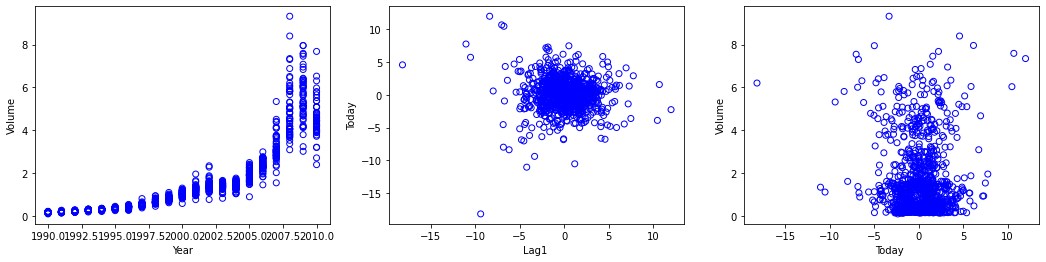

In [ ]:
##Graphiques
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4));

ax1.scatter(weekly.Year.values,weekly.Volume.values, facecolors='none', edgecolors='b');
ax1.set_xlabel('Year');
ax1.set_ylabel('Volume');

ax2.scatter(weekly.Lag1.values, weekly.Today.values, facecolors='none', edgecolors='b' );
ax2.set_xlabel('Lag1 ');
ax2.set_ylabel('Today');


ax3.scatter(weekly.Today.values, weekly.Volume.values, facecolors='none', edgecolors='b' );
ax3.set_xlabel('Today ');
ax3.set_ylabel('Volume');





b) Estimation du modèle Logit

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
##Extraction des variables explicatives pour estimation
predictors = weekly.columns[1:7]
X = sm.add_constant(weekly[predictors])

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
##Encodage de la variable binaire
Y = np.array([1 if el=='Up' else 0 for el in weekly.Direction.values])

In [ ]:
## Estimation du modèle logistique
logit = sm.Logit(Y,X)
results=logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.682350
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                0.006713
Time:                        11:54:08   Log-Likelihood:                -743.08
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1228
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7148     20.380      0.771      0.441     -24.229      55.659
Year          -0.0077      0.

c) Calcul de la matrice de confusion et fraction de prédictions correctes

In [ ]:
Y_predicted = results.predict(X)
Y_predicted= np.array(Y_predicted > 0.5, dtype=float)
table = np.histogram2d(Y_predicted, Y, bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print("Fraction prediction correcte =", (table[0,0]+table[1,1])/np.sum(table))



       Down     Up
Down   58.0   48.0
Up    426.0  557.0


Fraction prediction correcte = 0.5647382920110193


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

d) Estimation logit avec données d'entrainement 1990--2008

In [ ]:
## Découpage pour données d'entrainement
Xt_train = weekly.loc[weekly['Year']<=2008,:].Lag2
dir_train=weekly[weekly.Year<=2008].Direction
Yt_train =np.array([1 if el=='Up' else 0 for el in dir_train])
Yt_train = np.array([1 if el=='Up' else 0 for el in dir_train])

In [ ]:
## Découpage pour données test
Xt_test = sm.add_constant(weekly[weekly.Year > 2008].Lag2)
dir_test = weekly[weekly.Year > 2008].Direction
Yt_test = np.array([1 if el=='Up' else 0 for el in dir_test])


In [ ]:
## Estimation logistique sur splitted data
model = sm.Logit(Yt_train,Xt_train)
result = model.fit()
print(result.summary())
print('\n')


Optimization terminated successfully.
         Current function value: 0.690654
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                            0
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:               -0.004340
Time:                        12:33:35   Log-Likelihood:                -680.29
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag2           0.0629      0.029      2.192      0.028       0.007       0.119




In [ ]:
## Prediction with test data and confusion matrix
y_predicted = results.predict(X_test)
# assignation des probabilités aux classes
y_predicted= np.array(y_predicted > 0.5, dtype=float)

table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('matrice de confusion')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print("Taux derreur =", 1-(table[0,0]+table[1,1])/np.sum(table))


matrice de confusion
      Down    Up
Down   7.0   8.0
Up    36.0  53.0


Taux derreur = 0.42307692307692313


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

e) Reprendre d) avec LDA

In [ ]:
## Nous départageons également les données en entraînement et test
clf = LDA(solver='lsqr', store_covariance=True)
## Données d'entrainement
X_train = weekly[weekly.Year <= 2008].Lag2.values
X_train = X_train.reshape((len(X_train),1))


In [ ]:
# Données test
X_test = weekly[weekly.Year > 2008].Lag2.values
X_test = X_test.reshape((len(X_test),1))

In [ ]:
## Ajustement LDA des doonées du modèle
clf.fit(X_train, Yt_train)
print('Priors = ', clf.priors_ )
print('Class Means = ', clf.means_[0], clf.means_[1])
print('Coeffecients = ', clf.coef_)
print('\n')

Priors =  [0.44771574 0.55228426]
Class Means =  [-0.03568254] [0.26036581]
Coeffecients =  [[0.05780187]]




In [ ]:
##Faisons une prédiction sur les données test
y_predicted = clf.predict(X_test)
#convertir les proababilitées pour les faire appartenir à la classe 0 ou 1
y_predicted= np.array(y_predicted > 0.5, dtype=float)


In [ ]:
table = np.histogram2d(y_predicted, Yt_test, bins=2)[0]
print('matrice de confusion')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print("Taux derreur =", 1-(table[0,0]+table[1,1])/np.sum(table))


matrice de confusion
      Down    Up
Down  21.0  30.0
Up    22.0  31.0


Taux derreur = 0.5


f) Reprendre d) avec QDA

In [ ]:
qda = QDA(store_covariance=True)
qda.fit(X_train,Yt_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [ ]:
##Prédiction sur données test
y_predict = qda.predict(X_test)
y_predicted= np.array(y_predict > 0.5, dtype=float)

In [ ]:
## Calculons à présent la matrice de confusion
table = confusion_matrix( Yt_test,y_predict)
print('matrice de confusion')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Taux derreur =', 1-(table[0,0]+table[1,1])/np.sum(table))


matrice de confusion
      Down  Up
Down     0  43
Up       0  61


Taux derreur = 0.41346153846153844


g) Reprendre d) avec KNN, K=1

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, Yt_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
## Prédiction sur données test et matrice de confusion
y_predicted = clf.predict(X_test)

table = confusion_matrix(Yt_test,y_predicted )
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Taux derreur =', 1-(table[0,0]+table[1,1])/np.sum(table))


      Down  Up
Down    21  22
Up      30  31

Taux derreur = 0.5


In [ ]:
## h) La méthode QDA semble le mieux prédire les données car le taux d'erreur (0.41) est la plus faible comparativement aux deux
## autres méthodes. QDA semble donc ajuster le mieux les données.

In [ ]:
## i)  Expérimentez différentes combinaisons des prédicteurs, incluant des transformations et interactions. Reportez 
## les estimateurs et la matrice de confusion pour la méthode qui semble donner les meilleurs rÈsultats sur l'échantillon test.
## Expérimentez aussi plusieurs valeurs de K pour KNN.

In [ ]:
## Modèle avec lag1 lag2 et lag3 comme prédicteurs
predictors = weekly.columns[1:4]## selon la base de données
X_train = sm.add_constant(weekly[weekly.Year <= 2008][predictors])
response_train = weekly[weekly.Year <= 2008].Direction
y_train = np.array([1 if el=='Up' else 0 for el in response_train])


In [ ]:
## Les données test 
X_test = sm.add_constant(weekly[weekly.Year > 2008][predictors])
response_test = weekly[weekly.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])

In [ ]:
## Ajustement des données au modèle
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

Optimization terminated successfully.
         Current function value: 0.682912
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                0.006919
Time:                        13:35:16   Log-Likelihood:                -672.67
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.02472
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3921     23.720      1.281      0.200     -16.098      76.883
Year          -0.0151      0.

In [ ]:
### Prédiction de notre modèle et matrice de confusion
y_predicted = results.predict(X_test)
y_predicted= np.array(y_predicted > 0.5, dtype=float)

table = confusion_matrix(y_test, y_predicted)
print('matrice de confusion')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Taux derreur =', 1-(table[0,0]+table[1,1])/np.sum(table))

matrice de confusion
      Down  Up
Down    20  23
Up      19  42


Taux derreur = 0.40384615384615385


In [ ]:
## Modèle avec Lag1 et Lag2 et interaction Lag1*Lag2
weekly['Lag1xLag2'] = pd.Series(weekly.Lag1*weekly.Lag2, index=weekly.index)
predictors = ['Lag1', 'Lag2', 'Lag1xLag2']
X_train = sm.add_constant(weekly[weekly.Year <= 2008][predictors])
response_train = weekly[weekly.Year <= 2008].Direction 
y_train = np.array([1 if el=='Up' else 0 for el in response_train])

In [ ]:
## Données test
X_test = sm.add_constant(weekly[weekly.Year > 2008][predictors])
response_test = weekly[weekly.Year > 2008].Direction
y_test = np.array([1 if el=='Up' else 0 for el in response_test])


In [ ]:
## Ajustement des données
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print(results.summary())
print('\n')

Optimization terminated successfully.
         Current function value: 0.683701
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  985
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                            3
Date:                Thu, 17 Feb 2022   Pseudo R-squ.:                0.005772
Time:                        13:46:22   Log-Likelihood:                -673.45
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04990
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2114      0.065      3.273      0.001       0.085       0.338
Lag1          -0.0515      0.

In [ ]:
## Prédiction sur données test et matrice de confusion
y_predicted = results.predict(X_test) 
y_predicted= np.array(y_predicted > 0.5, dtype=float)
table = confusion_matrix(y_test, y_predicted)
print('matrice de confusion')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Taux derreur =', 1-(table[0,0]+table[1,1])/np.sum(table))


matrice de confusion
      Down  Up
Down     7  36
Up       8  53


Taux derreur = 0.42307692307692313


In [ ]:
##Expérimentons à présent plusieurs valeurs pour K avec KNN
### K=2
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, Yt_train)

##Prédiction sur données test et matrice de confusion
y_predicted = clf.predict(X_test)

table = confusion_matrix(Yt_test,y_predicted )
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Taux derreur =', 1-(table[0,0]+table[1,1])/np.sum(table))



      Down  Up
Down    32  11
Up      45  16

Taux derreur = 0.5384615384615384


In [ ]:
## K=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, Yt_train)

##Prédiction sur données test et matrice de confusion
y_predicted = clf.predict(X_test)

table = confusion_matrix(Yt_test,y_predicted )
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Taux derreur =', 1-(table[0,0]+table[1,1])/np.sum(table))


      Down  Up
Down    23  20
Up      33  28

Taux derreur = 0.5096153846153846


In [ ]:
## K=5 
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, Yt_train)

##Prédiction sur données test et matrice de confusion
y_predicted = clf.predict(X_test)

table = confusion_matrix(Yt_test,y_predicted )
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Taux derreur =', 1-(table[0,0]+table[1,1])/np.sum(table))


      Down  Up
Down    27  16
Up      24  37

Taux derreur = 0.3846153846153846


In [ ]:
## K=10
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, Yt_train)

##Prédiction sur données test et matrice de confusion
y_predicted = clf.predict(X_test)

table = confusion_matrix(Yt_test,y_predicted )
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Taux derreur =', 1-(table[0,0]+table[1,1])/np.sum(table))


      Down  Up
Down    24  19
Up      34  27

Taux derreur = 0.5096153846153846


In [ ]:
## K=11
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, Yt_train)

##Prédiction sur données test et matrice de confusion
y_predicted = clf.predict(X_test)

table = confusion_matrix(Yt_test,y_predicted )
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Taux derreur =', 1-(table[0,0]+table[1,1])/np.sum(table))


      Down  Up
Down    17  26
Up      28  33

Taux derreur = 0.5192307692307692


In [ ]:
##Apres avoir expérimenté plusieurs valeurs de K, le modèle KNN avec K=5 semble produire le taux d'erreur le plus faible.